In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
# import sklearn

In [2]:
data_path = '.\Fix CICIoT2023 10%.csv'
df = pd.read_csv(data_path)

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Just Mine\AppData\Local\Temp\ipykernel_10768\1926350706.py:1: SyntaxWarning: invalid escape sequence '\F'
  data_path = '.\Fix CICIoT2023 10%.csv'


In [3]:
print("Shape Dataset:", df.shape)

Shape Dataset: (4644782, 47)


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1016288


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
A

In [6]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (3628494, 47)


In [7]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Attack Type'],
      dtype='object')


In [8]:
print("Jumlah Serangan Pada Dataset: \n")
df_clean['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset: 



Attack Type
DDoS              2450878
DoS                737932
Mirai              242314
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64

In [9]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
flow_duration,3628494.0,7.262134e+00,3.572647e+02,0.000000,0.000000e+00,1.471647e-02,2.321106e-01,3.943572e+05
Header_Length,3628494.0,9.806348e+04,5.193582e+05,0.000000,5.400000e+01,7.180000e+01,1.375600e+04,9.831137e+06
Protocol Type,3628494.0,1.013753e+01,9.241336e+00,0.000000,6.000000e+00,6.000000e+00,1.684000e+01,4.700000e+01
Duration,3628494.0,6.701270e+01,1.581393e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,3628494.0,8.175992e+03,8.229018e+04,0.000000,2.199600e+00,1.893449e+01,8.567482e+02,8.388608e+06
Srate,3628494.0,8.175992e+03,8.229018e+04,0.000000,2.199600e+00,1.893449e+01,8.567482e+02,8.388608e+06
Drate,3628494.0,7.574018e-06,7.216878e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.336830e+01
fin_flag_number,3628494.0,6.010097e-02,2.376738e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,3628494.0,2.288150e-01,4.200700e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,3628494.0,6.517856e-02,2.468407e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [10]:
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

In [11]:
# Membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada label kategorikal.
label_encoder = LabelEncoder()
# Mengidentifikasi kategori unik dalam label y dan menetapkan nilai numerik untuk setiap kategori.
y_encoded = label_encoder.fit_transform(y)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [14]:
# Training model XGBoost
try:
    model.fit(X_scaled, y_encoded)
# Jika training ada error, maka akan mengoutput kannya. Digunakannya exception karena ada bug dari XGBoost dengan skilearn nya.
except Exception as e:
    print(f"Error pada saat memuat model fitting: {e}")

e:\Thesis\ThesisFL\lib\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:53:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
selector = SelectFromModel(model, threshold="mean", prefit=True)
X_selected = selector.transform(X_scaled)

print(f"\nJumlah fitur setelah seleksi dengan threshold mean: {X_selected.shape[1]}")


Jumlah fitur setelah seleksi dengan threshold mean: 5


In [16]:
# Tampilkan fitur yang dipilih
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print("\n=== Fitur Terpilih Berdasarkan Threshold ===")
print(selected_features.tolist())


=== Fitur Terpilih Berdasarkan Threshold ===
['rst_count', 'Min', 'AVG', 'IAT', 'Weight']


In [16]:
booster = model.get_booster()
importance_gain = booster.get_score(importance_type='gain')
importance_df = pd.DataFrame(importance_gain.items(), columns=["Fitur", "Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [17]:
print("\n=== Daftar Fitur dan Importance Score Berdasarkan GAIN ===")
print(importance_df)


=== Daftar Fitur dan Importance Score Berdasarkan GAIN ===
   Fitur   Importance
31   f39  6640.166992
37   f45  1989.118652
26   f34  1932.326782
15   f18   455.177063
28   f36   411.278198
32   f40   177.963943
14   f17   161.969650
36   f44   151.333603
2     f2   137.850464
13   f16   104.083900
23   f30   100.095734
19   f24    66.292015
33   f41    61.359203
5     f7    55.423870
25   f33    51.636604
6     f8    42.806763
20   f26    36.376629
17   f20    35.691753
0     f0    28.872122
1     f1    28.262341
35   f43    20.944193
16   f19    20.365923
12   f15    16.751051
4     f4    16.016350
30   f38    13.820601
21   f27    13.730524
7     f9    13.696778
27   f35    11.156638
8    f10    11.120927
11   f14     8.753878
22   f29     7.918258
3     f3     7.280857
9    f11     5.047649
34   f42     3.105694
18   f21     3.068748
29   f37     3.052461
10   f12     1.626805
24   f31     1.603762


In [18]:
top_features = importance_df.sort_values(by="Importance", ascending=False).head(20)
print(top_features)

   Fitur   Importance
31   f39  6640.166992
37   f45  1989.118652
26   f34  1932.326782
15   f18   455.177063
28   f36   411.278198
32   f40   177.963943
14   f17   161.969650
36   f44   151.333603
2     f2   137.850464
13   f16   104.083900
23   f30   100.095734
19   f24    66.292015
33   f41    61.359203
5     f7    55.423870
25   f33    51.636604
6     f8    42.806763
20   f26    36.376629
17   f20    35.691753
0     f0    28.872122
1     f1    28.262341


In [19]:
# Buat mapping dari f0, f1, ..., fN ke nama kolom asli
feature_names = X.columns.tolist()
mapping = {f"f{i}": col for i, col in enumerate(feature_names)}

# Ganti nama 'Fitur' di importance_df dengan nama asli
importance_df['Fitur'] = importance_df['Fitur'].map(mapping)

# Cetak ulang hasil importance dengan nama fitur asli
top_features = importance_df.sort_values(by="Importance", ascending=False).head(20)

print("\n=== Top 20 Fitur Berdasarkan Gain (Nama Asli) ===")
print(top_features)



=== Top 20 Fitur Berdasarkan Gain (Nama Asli) ===
              Fitur   Importance
31              IAT  6640.166992
37           Weight  1989.118652
26              Min  1932.326782
15        rst_count   455.177063
28              AVG   411.278198
32           Number   177.963943
14        urg_count   161.969650
36         Variance   151.333603
2     Protocol Type   137.850464
13        fin_count   104.083900
23             ICMP   100.095734
19              SSH    66.292015
33         Magnitue    61.359203
5   fin_flag_number    55.423870
25          Tot sum    51.636604
6   syn_flag_number    42.806763
20              TCP    36.376629
17            HTTPS    35.691753
0     flow_duration    28.872122
1     Header_Length    28.262341


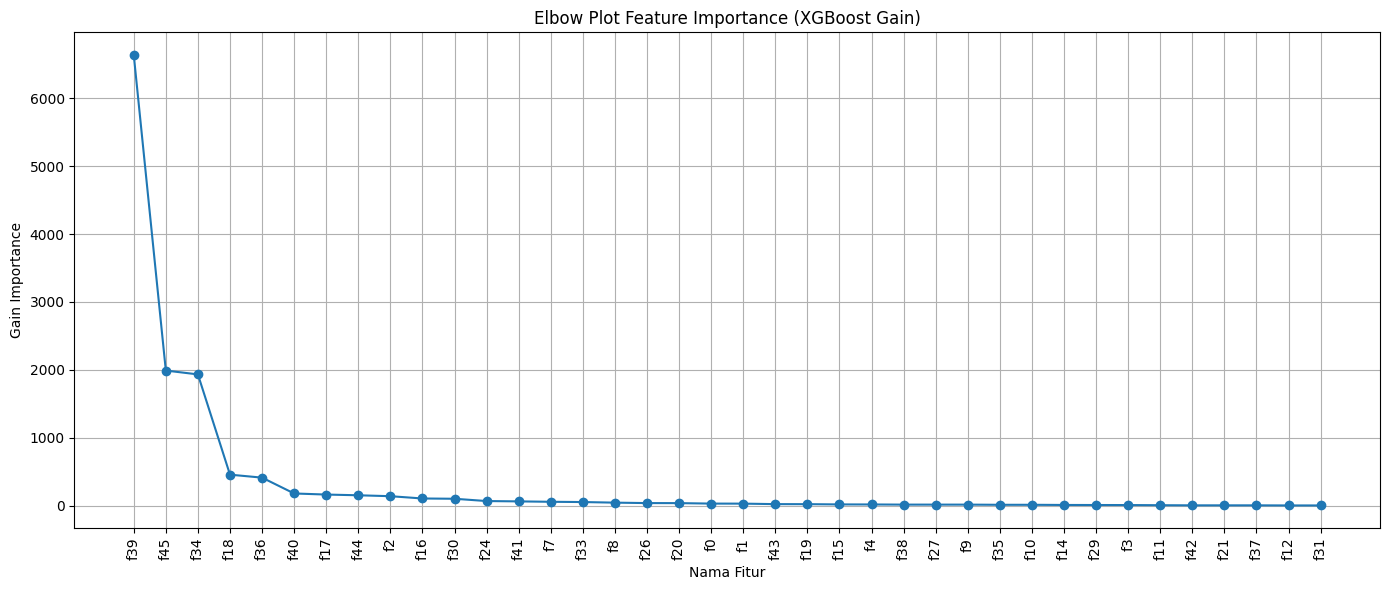

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = [
    "f39", "f45", "f34", "f18", "f36", "f40", "f17", "f44", "f2", "f16",
    "f30", "f24", "f41", "f7", "f33", "f8", "f26", "f20", "f0", "f1",
    "f43", "f19", "f15", "f4", "f38", "f27", "f9", "f35", "f10", "f14",
    "f29", "f3", "f11", "f42", "f21", "f37", "f12", "f31"
]

gain_scores = []  # List dari skor GAIN kamu, urut dari tertinggi ke terendah

plt.figure(figsize=(14, 6))
plt.plot(feature_names, gain_scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel("Nama Fitur")
plt.ylabel("Gain Importance")
plt.title("Elbow Plot Feature Importance (XGBoost Gain)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

threshold = np.mean(gain_scores)
selected_features = [f for f, score in zip(feature_names, gain_scores) if score > threshold]


In [5]:
print(selected_features)

['f39', 'f45', 'f34', 'f18', 'f36']
